# 06A. Random number generators

### Mingyang Lu

### 2/12/2024

# Intro

A random number generator (RNG) generates a series of numbers which are pseudo random. There are many efficient algorithms (usually take less than a dozen of arithmetic/logical operations) of RNGs. Statistical tests need to be done to evaluate the randomness of a series of numbers $\{R_i\}$ generated by an RNG. A simple *visual* test (similar to [The Pickover Test](https://www.r-bloggers.com/2017/09/how-good-is-that-random-number-generator/)) is to plot $(R_i, R_{i+k})$, for $k = 1,2,3$. Here there is no apparent patterns in the scatter plot, indicating the RNG is good.

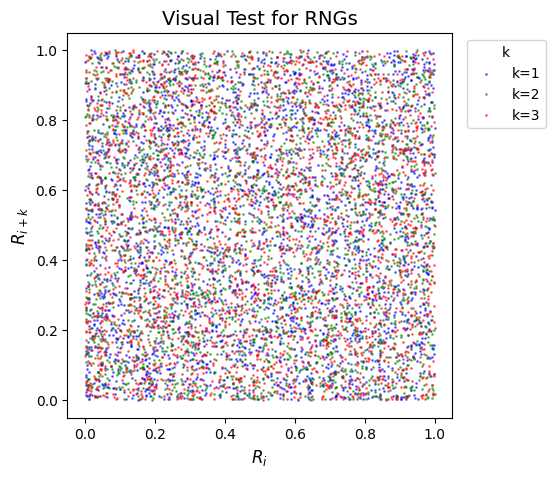

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10)  # set the RNG seed
n = 3000  # total number of values to be tested
r = np.random.rand(n)  # generate a series of n pseudo-random numbers from NumPy's default RNG

# a visual test for RNGs
def rng_test(r):
    # r: a series of random numbers
    plt.figure(figsize=(6, 5))
    plt.scatter(r[:n-1], r[1:], marker='o', s=1, alpha=0.5, color='blue', label='k=1')
    plt.scatter(r[:n-2], r[2:], marker='o', s=1, alpha=0.5, color='green', label='k=2')
    plt.scatter(r[:n-3], r[3:], marker='o', s=1, alpha=0.5, color='red', label='k=3')

    plt.xlabel(r'$R_i$', fontsize=12)
    plt.ylabel(r'$R_{i+k}$', fontsize=12)
    plt.legend(title='k', loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=10)
    plt.title('Visual Test for RNGs', fontsize=14)
    plt.gca().set_aspect('equal', adjustable='box') 
    plt.show()

rng_test(r)

Keep in mind that the plot would look different for RNGs of different types of distribution (uniform, exponential, Gaussian). 

# Uniform distribution of discrete numbers

In Python, we can generate discrete random numbers in a uniform distribution by using the *np.random.choice* function. Note that the sampling needs to be done with replacement (*i.e.*, "replace = True"), otherwise the random numbers would be correlated. 

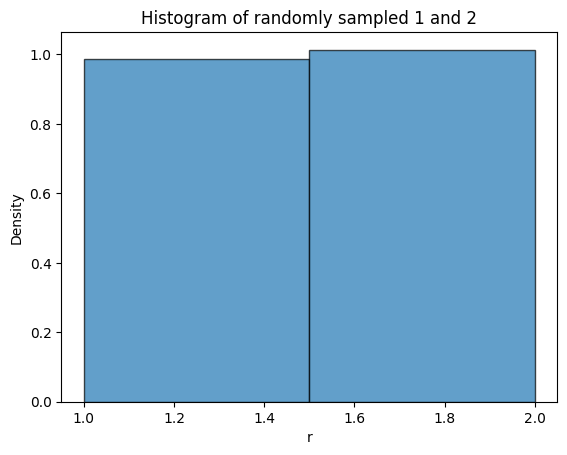

In [2]:
# Total number of values to be sampled
n = 10000

# Generate random binary samples (1 and 2) with replacement
r_binary = np.random.choice([1, 2], size=n, replace=True)

# Create a histogram plot
plt.hist(r_binary, bins=2, density=True, edgecolor='black', alpha=0.7)

plt.xlabel('r')
plt.ylabel('Density')
plt.title('Histogram of randomly sampled 1 and 2')
plt.show()

# Exponential distribution

From an RNG that generates random numbers $x$ from a uniform distribution of (0, 1), we can easily obtain random numbers $y$ from an exponential distribution. (See the lecture presentation for the derivation)

$$ y = -ln(x) \tag{1}$$

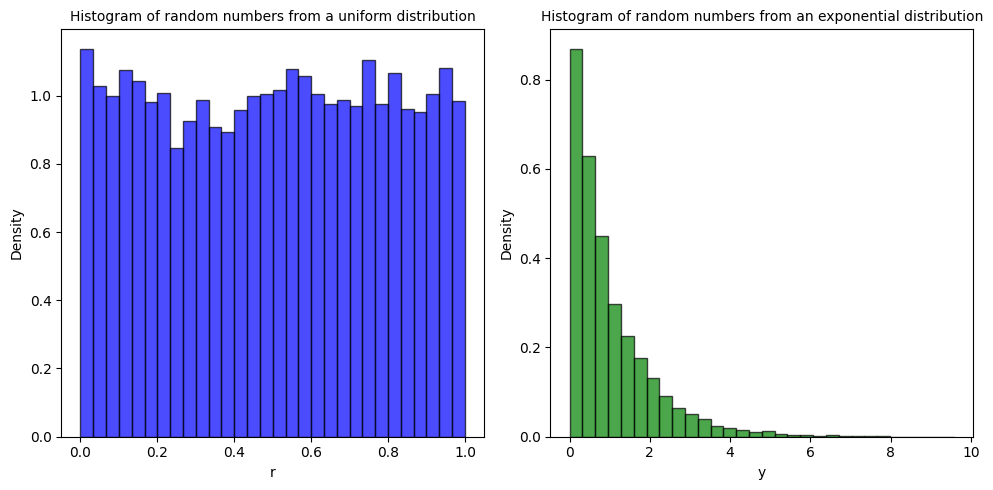

In [3]:
n = 10000

# Generate random numbers from a uniform distribution
r = np.random.rand(n)

# Calculate random numbers from an exponential distribution
y = -np.log(r)

# Create histogram plots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(r, bins=30, density=True, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('r')
plt.ylabel('Density')
plt.title('Histogram of random numbers from a uniform distribution', fontsize = 10)

plt.subplot(1, 2, 2)
plt.hist(y, bins=30, density=True, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('y')
plt.ylabel('Density')
plt.title('Histogram of random numbers from an exponential distribution', fontsize = 10)

plt.tight_layout()
plt.show()


# Gaussian distribution

To obtain random numbers from a Gaussian distribution, we use the Box-Muller method. We first sample two uniform random numbers from (-1, 1), $x$ and $y$, which satisfies $0<R^2<1$, where $R^2 = x^2 + y^2$. If not, another two numbers $x$ and $y$ are sampled.

\begin{equation}
\begin{cases}
r_1 = x\sqrt{-2ln(R^2)/R^2} \\
r_2 = y\sqrt{-2ln(R^2)/R^2}  \tag{2}
\end{cases}
\end{equation}

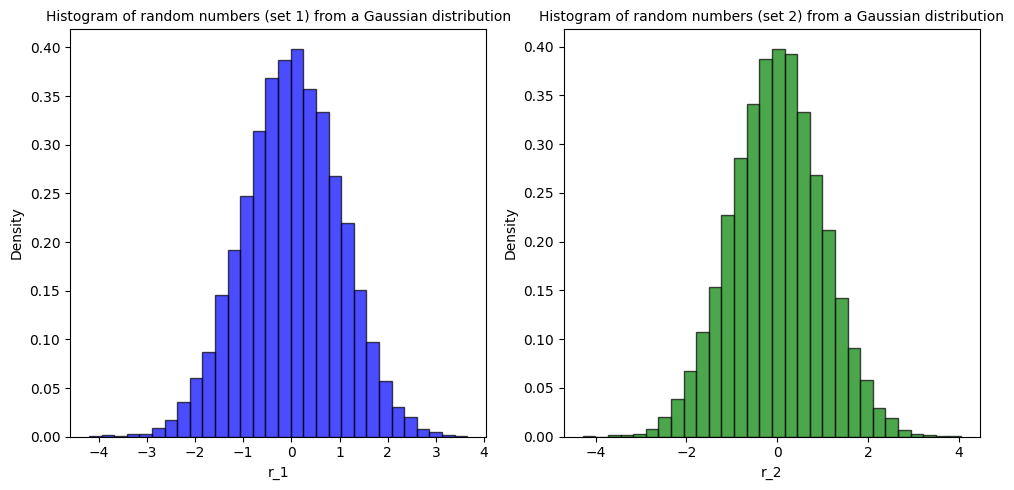

In [4]:
# RNG for a Gaussian distribution, of course you don't need this. But it's interesting to know how it works.
def ran_gaussian():
    while True:
        x = 2 * np.random.rand(2) - 1  # Generate two random numbers uniformly from [-1, 1]
        R2 = np.sum(x * x)
        if 0 < R2 < 1.0 and abs(R2) > 1e-6:
            break
    fac = np.sqrt(-2 * np.log(R2) / R2)
    return x * fac

n = 10000
y = np.array([ran_gaussian() for _ in range(n)]).T

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(y[0], bins=30, density=True, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('r_1')
plt.ylabel('Density')
plt.title('Histogram of random numbers (set 1) from a Gaussian distribution', fontsize = 10)

plt.subplot(1, 2, 2)
plt.hist(y[1], bins=30, density=True, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('r_2')
plt.ylabel('Density')
plt.title('Histogram of random numbers (set 2) from a Gaussian distribution', fontsize = 10)

plt.tight_layout()
plt.show()
